In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import os
from torchsummary import summary

## Dataset count

In [73]:
ORIGINAL_DATA_DIR = "../original_data/train/"
AUG_DATA_DIR = "../aug_data_new/train/"

original_data_count = {}
aug_data_count = {}

for root, dirs, files in os.walk(ORIGINAL_DATA_DIR):
    if len(files):
        original_data_count[root.split("/")[-1]] = len(files)

for root, dirs, files in os.walk(AUG_DATA_DIR):
    if len(files):
        aug_data_count[root.split("/")[-1]] = len(files)

# sorting for plotting 
original_data_count = {key: value for key, value in sorted(original_data_count.items())}
aug_data_count = {key: value for key, value in sorted(aug_data_count.items())}

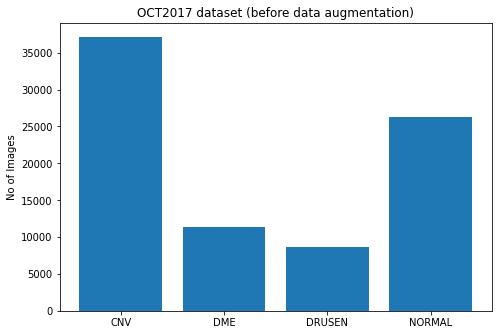

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(original_data_count.keys(), original_data_count.values())
ax.set_ylabel("No of Images")
ax.set_title("OCT2017 dataset (before data augmentation)")
plt.show()

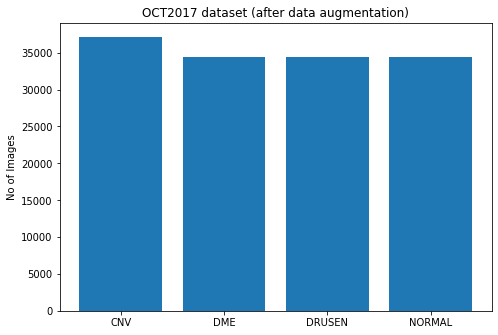

In [76]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(aug_data_count.keys(), aug_data_count.values())
ax.set_ylabel("No of Images")
ax.set_title("OCT2017 dataset (after data augmentation)")
plt.show()

## Event logs

### Real dataset

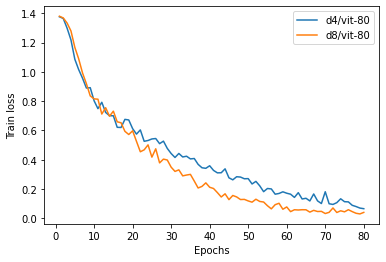

In [97]:
def get_logs(log_dir):
    event_accumulator = EventAccumulator(log_dir)
    event_accumulator.Reload()
    try:
        events = event_accumulator.Scalars("Train_Loss")
    except:
        events = event_accumulator.Scalars("Vit_Loss")

    logs = {x.step : x.value for x in events}
  
    return logs.keys(), logs.values()

# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120", "d4/vit-80"]
# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80"]
model_trained = ["d4/vit-80", "d8/vit-80"]

log_dirs_ls = [f'./runs/{x}' for x in model_trained]

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)
# plt.title("Training loss plot on weighted sampling dataset")
plt.ylabel("Train loss")
plt.xlabel("Epochs")
plt.legend(model_trained)
plt.show()

### Augmented dataset

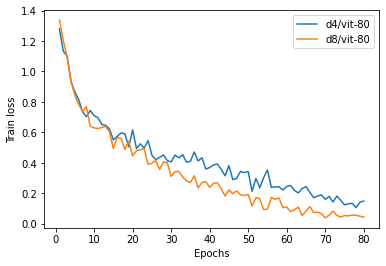

In [98]:
# model_trained = ["cnn-80", "resnet50-80", "xception-80", "d8/vit-80", "mobilenetv2-80", "d8/vit-120"]
# model_trained = ["d8/vit-sam-80"]

log_dirs_ls = [f'../scripts_aug/runs/{x}' for x in model_trained]

for log_dir in log_dirs_ls:
    x,y = get_logs(log_dir)
    plt.plot(x,y)

# plt.title("Training loss plot on augmented dataset")
plt.ylabel("Train loss")
plt.xlabel("Epochs")
plt.legend(model_trained)
plt.show()

## Performance metrics

### Real dataset

In [113]:
results = pd.read_csv("./analysis/results.csv")

results = results[["model",'epoch', 'f1_score', 'precision', 'recall', 'accuracy', 'params']]
# results = results[['epoch', 'f1_score', 'accuracy', 'params']]
# results = results.drop([0,1,2,3,6])
print(results.to_latex(index=False))
# results


\begin{tabular}{rrrr}
\toprule
 epoch &  f1\_score &  accuracy &  params \\
\midrule
   120 &  0.973974 & 97.400002 & 1306628 \\
    80 &  0.972929 & 97.300003 & 1898500 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1729526/141335919.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex(index=False))


### Augmented dataset

In [117]:
results = pd.read_csv("../scripts_aug/analysis/results.csv")

results = results[["model",'epoch', 'f1_score', 'precision', 'recall', 'accuracy', 'params']]
# results = results[['epoch', 'f1_score', 'accuracy', 'params']]
# results = results.drop([0,1,3,4])
# results = results.drop([4])

# print(results.to_latex(index=False))
results


,model,epoch,f1_score,precision,recall,accuracy,params
0,resnet50-80,80,0.891829,0.899781,0.893,89.300003,23516228
1,cnn-80,80,0.995000,0.995012,0.995,99.500008,3541000
2,vit-d8-25x150-80,80,0.967951,0.968722,0.968,96.800003,1306628
3,xception-80,80,0.847364,0.857084,0.849,84.900002,20815148
4,mobilenetv2-80,80,0.879502,0.891977,0.882,88.200005,2228996
5,vit-25x150-120,120,0.966928,0.968209,0.967,96.700005,1306628
